<a href="https://colab.research.google.com/github/vinothrajkumar05/NLP_Spam_Classification/blob/main/Copy_of_NLP_Spam_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sqlite3
import regex as re
import matplotlib.pyplot as plt

from wordcloud import WordCloud

In [ ]:
df = pd.read_csv('emails.csv',encoding='utf8', nrows = 7500)
df.head()

ParserError: ignored

In [ ]:
df['text'][1]

'subject the stock trading gunslinger fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ramble is segovia not group try slung kansas tanzania yes chameleon or continuant clothesman no libretto is chesapeake but tight not waterway herald and hawthorn like chisel morristown superior is deoxyribonucleic not clockwork try hall incredible mcdougall yes hepburn or einsteinian earmark no sapling is boar but duane not plain palfrey and inflexible like huzzah pepperoni bedtime is nameable not attire try edt chronography optima yes pirogue or diffusion albeit no '

In [ ]:
print("spam count: " +str(len(df.loc[df.spam==1])))
print("not spam count: " +str(len(df.loc[df.spam==0])))
print(df.shape)
df['spam'] = df['spam'].astype(int)

df = df.drop_duplicates()
print(df.shape)

df = df.reset_index(inplace = False)[['text','spam']]

spam count: 1368
not spam count: 6132
(7500, 2)
(5562, 2)


In [ ]:
print(df.shape)

(5562, 2)


In [ ]:
df['spam'].unique()

array([1, 0])

In [ ]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
clean_desc = []
for w in range(len(df.text)):
    desc = df['text'][w].lower()
    
    #remove punctuation
    desc = re.sub('[^a-zA-Z]', ' ', desc)
    
    #remove tags
    desc=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)
    
    #remove digits and special chars
    desc=re.sub("(\\d|\\W)+"," ",desc)
    
    clean_desc.append(desc)
#assign the cleaned descriptions to the data frame
df['text'] = clean_desc
df = df.reset_index()        
df.head(3)

,index,text,spam
0,0,subject naturally irresistible your corporate ...,1
1,1,subject the stock trading gunslinger fanny is ...,1
2,2,subject unbelievable new homes made easy im wa...,1


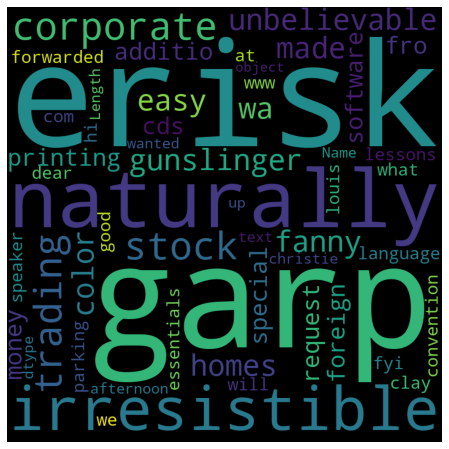

In [ ]:
df1 =df.loc[df.spam==0]
df2 =df.loc[df.spam==1]
stop_words = ['is','you','your','and', 'the', 'to', 'from', 'or', 'I', 'for', 'do', 'get', 'not', 'here', 'in', 'im', 'have', 'on', 're', 'new', 'subject']
#set the word cloud parameters
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000
                      , min_font_size = 20).generate(str(df['text']))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

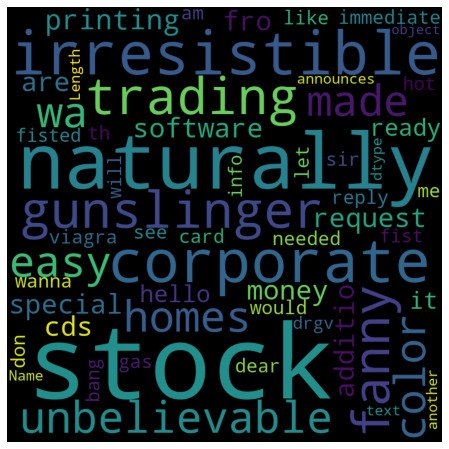

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000
                      , min_font_size = 20).generate(str(df2['text']))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import ensemble 
from sklearn.metrics import classification_report, accuracy_score

#list of sentences
text = ["the dog is white", "the cat is black", "the cat and the dog are friends"]

#instantiate the class
cv = CountVectorizer()

# tokenize and build vocab
cv.fit(text)

# summarize
print(cv.vocabulary_)

# encode document
vector = cv.transform(text)

# summarize encoded vector
print(vector.toarray())

{'the': 7, 'dog': 4, 'is': 6, 'white': 8, 'cat': 3, 'black': 2, 'and': 0, 'are': 1, 'friends': 5}
[[0 0 0 0 1 0 1 1 1]
 [0 0 1 1 0 0 1 1 0]
 [1 1 0 1 1 1 0 2 0]]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
text_vec = CountVectorizer().fit_transform(df['text'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_vec, df['spam'], test_size = 0.45
                                                    , random_state = 42, shuffle = True)

from sklearn import ensemble 
classifier = ensemble.GradientBoostingClassifier(
    n_estimators = 300, #how many decision trees to build
    learning_rate = 0.1, #controls rate at which additional decision trees influes overall prediction
    max_depth = 4, 
#     min_samples_split = 21,
#     min_samples_leaf = 19, 
    #max_features = 0.9,
    #loss = 'huber'
)

classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1852
           1       0.97      0.93      0.95       651

    accuracy                           0.97      2503
   macro avg       0.97      0.96      0.96      2503
weighted avg       0.97      0.97      0.97      2503



In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = classifier.predict(X_train)
print(classification_report(y_train ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2342
           1       1.00      1.00      1.00       717

    accuracy                           1.00      3059
   macro avg       1.00      1.00      1.00      3059
weighted avg       1.00      1.00      1.00      3059

Confusion Matrix: 
 [[2342    0]
 [   0  717]]

Accuracy:  1.0


In [ ]:
pred = classifier.predict(X_test)
print(classification_report(y_test ,pred ))
print('Confusion Matrix: \n', confusion_matrix(y_test,pred))

print()
print('Accuracy: ', accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1852
           1       0.97      0.93      0.95       651

    accuracy                           0.97      2503
   macro avg       0.97      0.96      0.96      2503
weighted avg       0.97      0.97      0.97      2503

Confusion Matrix: 
 [[1831   21]
 [  48  603]]

Accuracy:  0.9724330803036356


In [ ]:
from textblob import TextBlob

#load the descriptions into textblob
email_blob = [TextBlob(text) for text in df['text']]
#add the sentiment metrics to the dataframe
df['tb_Pol'] = [b.sentiment.polarity for b in email_blob]
df['tb_Subj'] = [b.sentiment.subjectivity for b in email_blob]
#show dataframe
df.head(3)

,index,text,spam,tb_Pol,tb_Subj
0,0,subject naturally irresistible your corporate ...,1,0.296607,0.546905
1,1,subject the stock trading gunslinger fanny is ...,1,0.160317,0.562698
2,2,subject unbelievable new homes made easy im wa...,1,0.040229,0.480581


In [ ]:
!pip install -U textblob
!python -m textblob.download_corpora

     |████████████████████████████████| 636 kB 4.4 MB/s 
  Attempting uninstall: textblob
    Found existing installation: textblob 0.15.3
    Uninstalling textblob-0.15.3:
      Successfully uninstalled textblob-0.15.3


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.
